Imports

In [1]:
!pip install sktime
!pip install pandas
!pip install seaborn
!pip install sklearn


In [2]:
from sktime.datasets import load_from_arff_to_dataframe
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import zipfile
import shutil
import os


creating datasets and spliting

In [3]:
with zipfile.ZipFile("datasets.zip","r") as zip_ref:
    zip_ref.extractall()


In [4]:
X_train_sports, y_train_sports = load_from_arff_to_dataframe('RacketSports\RacketSports_TRAIN.arff')
X_test_sports, y_test_sports = load_from_arff_to_dataframe('RacketSports\RacketSports_TEST.arff')

data_mitbih_train = pd.read_csv('ECG\mitbih_train.csv', header=None)
data_mitbih_test = pd.read_csv('ECG\mitbih_test.csv', header=None)

X_train_mitbih = data_mitbih_train.iloc[:, 0:-1]
y_train_mitbih = data_mitbih_train.iloc[:, -1]

X_test_mitbih = data_mitbih_test.iloc[:, 0:-1]
y_test_mitbih = data_mitbih_test.iloc[:, -1]

print(y_train_mitbih.head(5))

data_ptbdb_abnormal = pd.read_csv('ECG\ptbdb_abnormal.csv', header=None)
data_ptbdb_normal = pd.read_csv('ECG\ptbdb_normal.csv', header=None)

data_ptbdb = pd.concat([data_ptbdb_abnormal, data_ptbdb_normal])

X_ptbdb = data_ptbdb.iloc[:, 0:-1]
y_ptbdb = data_ptbdb.iloc[:, -1]

X_train_ptbdb, X_test_ptbdb, y_train_ptbdb, y_test_ptbdb = train_test_split(X_ptbdb, y_ptbdb, test_size=0.2, random_state=42)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 187, dtype: float64


In [14]:
labels_sports = ['Badminton_Smash',
                'Badminton_Clear',
                'Squash_ForehandBoast',
                'Squash_BackhandBoast']

labels_mitbih = list(range(5))

# labels_ptbdb = ['normal', 'abnormal']
labels_ptbdb = [0, 1]

datasets = [y_train_sports, y_test_sports, y_train_mitbih, y_test_mitbih, y_train_ptbdb, y_test_ptbdb]

plot_labels = [labels_sports, labels_mitbih, labels_ptbdb]
plot_titles = ['RacketSports', 'ECG Heartbeat Categorization Dataset - MIT-BIH', 'ECG Heartbeat Categorization Dataset - PTB Diagnostic']
plot_subtitles = ['Train Set', 'Test Set']

sns.set(rc={'figure.autolayout': True})

bg_color = '#E5E6F0'
color_line = '#0F101A'
colors = ['#5465FF', '#788BFF', '#9BB1FF', '#BFD7FF', '#D1EAFF', '#E2FDFF']
sns.set_palette(sns.color_palette(colors))



(151,)
RacketSports
Train Set


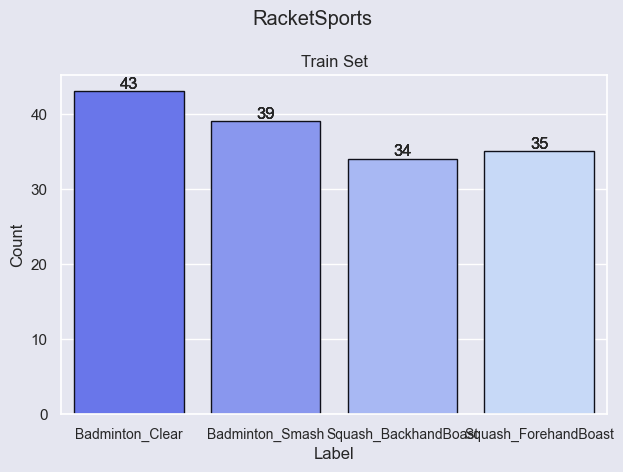

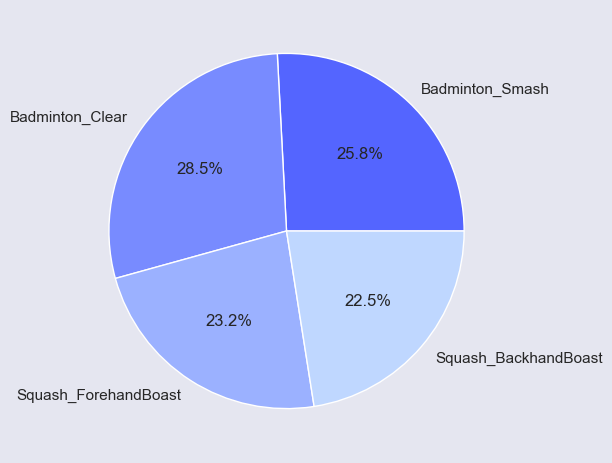

(152,)
RacketSports
Test Set


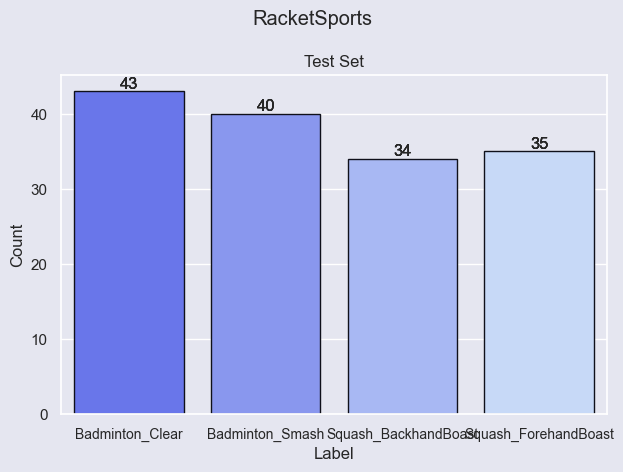

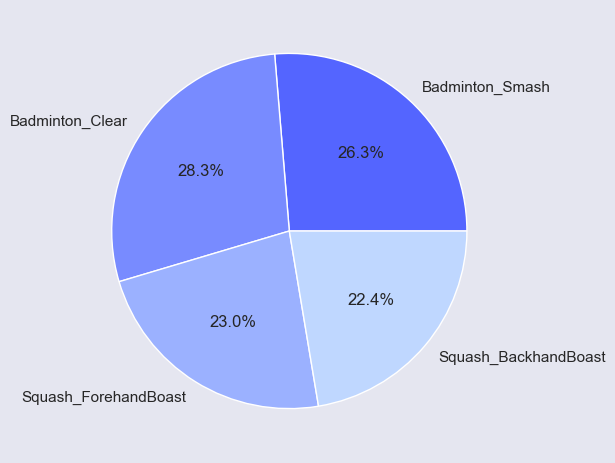

(87554,)
ECG Heartbeat Categorization Dataset - MIT-BIH
Train Set


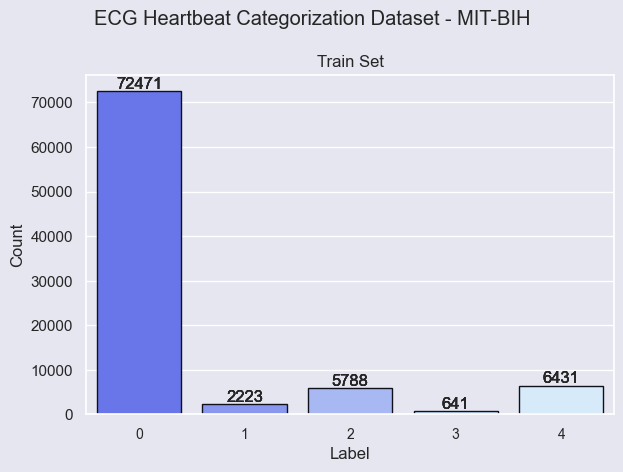

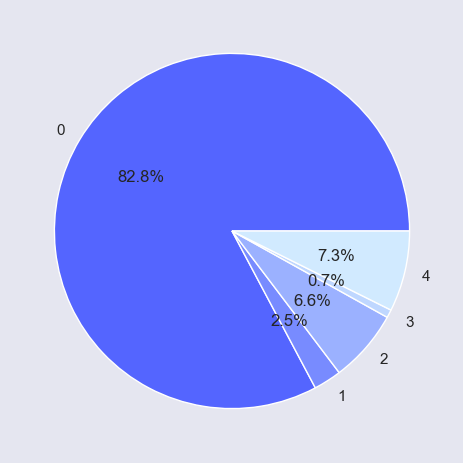

(21892,)
ECG Heartbeat Categorization Dataset - MIT-BIH
Test Set


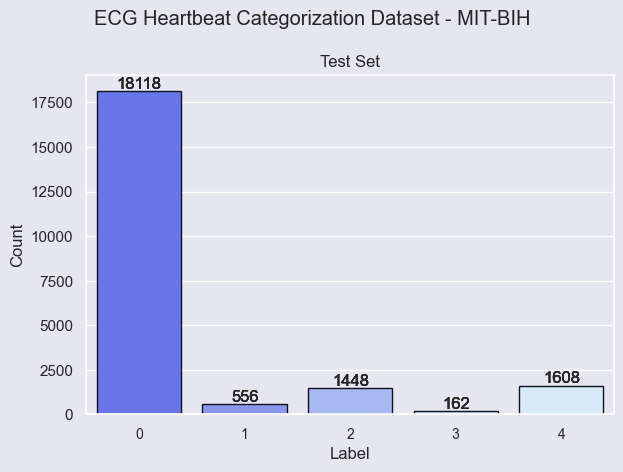

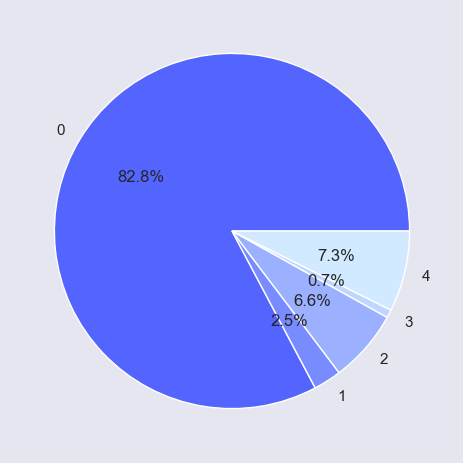

(11641,)
ECG Heartbeat Categorization Dataset - PTB Diagnostic
Train Set


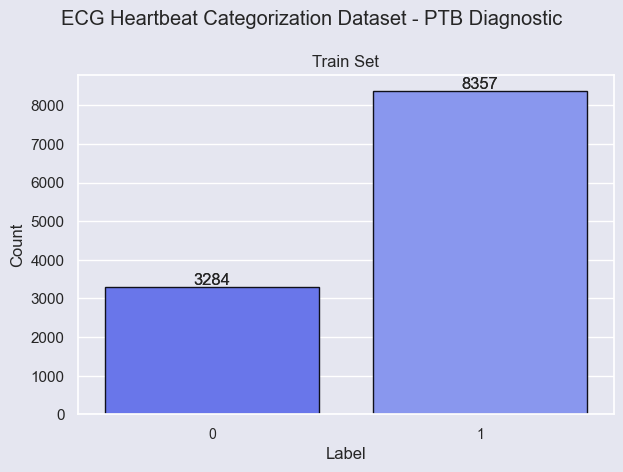

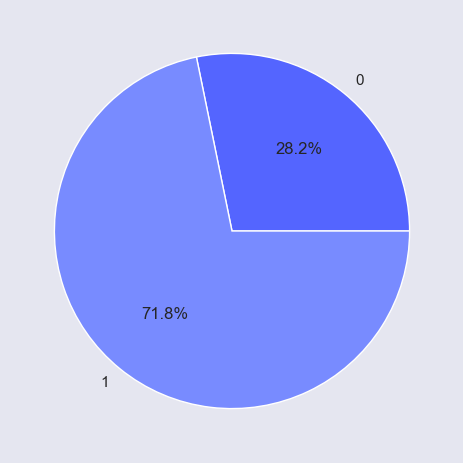

(2911,)
ECG Heartbeat Categorization Dataset - PTB Diagnostic
Test Set


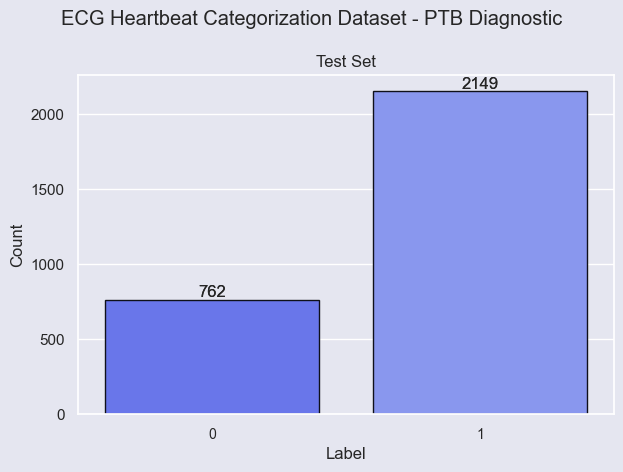

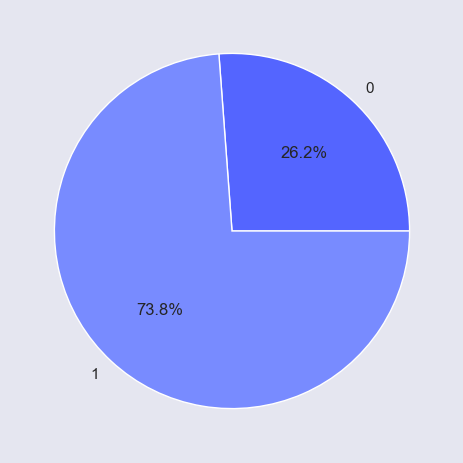

In [16]:
results_dir = '3.1/1/'

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

for index in range(len(datasets)):
    # bar plot for class imbalance
    print(datasets[index].shape)
    print(plot_titles[index // 2])
    print(plot_subtitles[index % 2])
    plt.figure(facecolor=bg_color)
    ax = sns.countplot(x=datasets[index], order=np.unique(plot_labels[index // 2]), edgecolor=color_line)
    ax.set_facecolor(bg_color)

    for p in ax.patches:
        ax.bar_label(container=ax.containers[0])

    plt.title(plot_subtitles[index % 2])
    plt.suptitle(plot_titles[index // 2])
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(fontsize=10)
    plt.savefig(results_dir + plot_titles[index // 2] + '_' + plot_subtitles[index % 2] + '_barchart.png')
    plt.show()

    # cute pie chart for visualization
    counts = [len(datasets[index][datasets[index] == label]) for label in plot_labels[index//2]]
    plt.figure(facecolor=bg_color)
    plt.pie(counts, labels=plot_labels[index // 2], autopct='%1.1f%%')
    plt.savefig(results_dir + plot_titles[index // 2] + '_' + plot_subtitles[index % 2] + '_piechart.png')
    plt.show()


[  1.266676  -2.180751  -0.943348   0.440631   1.562197   0.2483
   1.667997   1.143273  -0.354614   0.025025  -2.094929   1.409416
 -15.84361  -22.66174  -15.777729 -11.565274   0.184927   2.184308
  -2.918847  -1.438143  -1.832789  -2.392894  -2.936923  -1.699626
  -1.699626  -0.559298  -0.559298  -0.559298  -0.559298  -0.559298]


<Figure size 640x480 with 0 Axes>

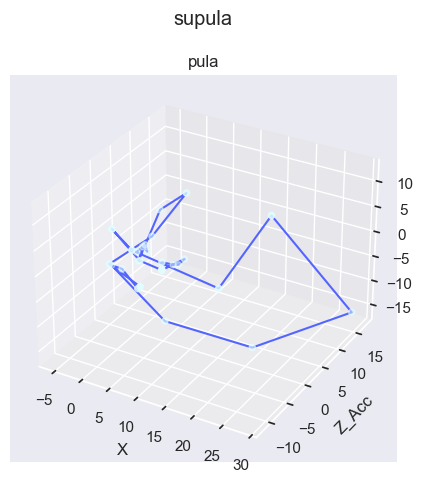

<Figure size 640x480 with 0 Axes>

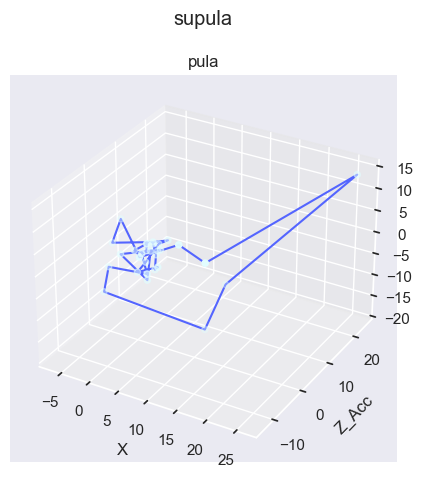

<Figure size 640x480 with 0 Axes>

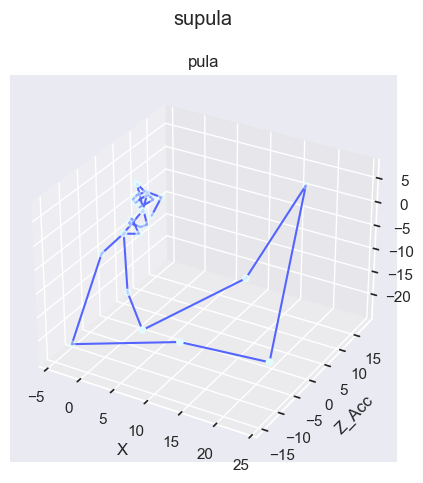

<Figure size 640x480 with 0 Axes>

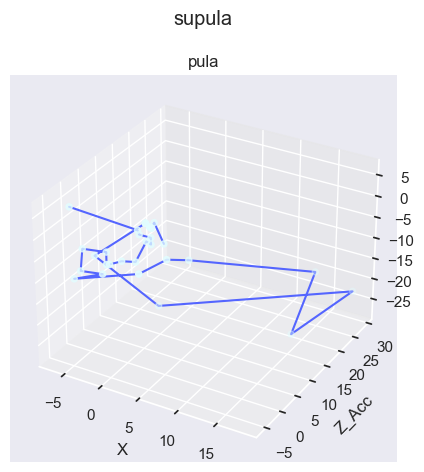

In [26]:
import random
from mpl_toolkits.mplot3d import Axes3D

random.seed(2)
results_dir = '3.1/2/'

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

print(X_train_sports.to_numpy()[0][0].to_numpy())


for label in labels_sports:
    while True:
        index = random.randint(0, len(y_train_sports) - 1)
        if y_train_sports[index] == label:
            plt.figure(facecolor=bg_color)
            ax = plt.figure().add_subplot(projection='3d')

            x_acc = X_train_sports.to_numpy()[index][0].to_numpy()
            y_acc = X_train_sports.to_numpy()[index][1].to_numpy()
            z_acc = X_train_sports.to_numpy()[index][2].to_numpy()

            x_giro = X_train_sports.to_numpy()[index][3].to_numpy()
            y_giro = X_train_sports.to_numpy()[index][4].to_numpy()
            z_giro = X_train_sports.to_numpy()[index][5].to_numpy()

            ax.plot(x_acc, y_acc, z_acc, label='curve in (x, y)', color=colors[0], zorder=-1)
            ax.scatter(x_acc, y_acc, z_acc, label='curve in (x, y)', color=colors[5])

            plt.title('pula')
            plt.suptitle('supula')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.ylabel('Z_Acc')
            plt.show()

            # ax.plot(x_giro, y_giro, z_giro, label='curve in (x, y)')
            # plt.show()

            break

In [8]:

# # # X.head()
# # # X["dim_5"]

# # # sns.set(rc={'figure.autolayout': True})
# # # Get the counts of each label

# # labels = {'Badminton_Smash' : 'Btn_Smash',
# #           'Badminton_Clear' : 'Btn_Clear',
# #           'Squash_ForehandBoast' : 'Sqh_Forehand',
# #           'Squash_BackhandBoast' : 'Sqh_Backhand'}
# # count = []

# # for label in labels:
# #     count.append(np.count_nonzero(y_Sports == label))

# # count = np.array(count)
# # labels_count = list(labels.values())

# # # Use seaborn to create a bar plot
# # sns.set(rc={'figure.autolayout': True})
# # sns.barplot(x=labels_count, y=count, palette='Set2')

# # # # Set the plot title and labels
# # plt.suptitle('ce e asta??')
# # plt.title('Frecvența de apariție a fiecărei etichete')
# # plt.xlabel('Labels')
# # plt.ylabel('Count')

# # # Set the font size of the x-axis labels
# # plt.xticks(fontsize=10)

# # # Display the plot
# # plt.show()



# # # X_mitbih, y_mitbih
# # count = []
# # labels_count = []
# # for label in range(5):
# #     count.append(np.count_nonzero(y_mitbih == label))
# #     labels_count.append(label)


# # count = np.array(count)
# # labels_count = np.array(labels_count)

# # # # Use seaborn to create a bar plot
# # sns.set(rc={'figure.autolayout': True})
# # sns.barplot(x=labels_count, y=count, palette='Set2')

# # # # # Set the plot title and labels
# # plt.suptitle('ce e asta??')
# # plt.title('Frecvența de apariție a fiecărei etichete')
# # plt.xlabel('Labels')
# # plt.ylabel('Count')

# # # # Set the font size of the x-axis labels
# # plt.xticks(fontsize=10)

# # # # Display the plot
# # plt.show()



In [9]:
# TO DO for each label from dataset

wtf = X_test_sports.to_numpy()

X_train_sports.head(5)


# x_acc = X_test_sports["dim_0"].to_numpy()
# y_acc = X_test_sports["dim_1"].to_numpy()
# z_acc = X_test_sports["dim_2"].to_numpy()


# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(x_acc[0], y_acc[0], z_acc[0])

# x_gir = X_test_sports["dim_3"].to_numpy()
# y_gir = X_test_sports["dim_4"].to_numpy()
# z_gir = X_test_sports["dim_5"].to_numpy()


# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(x_gir[0], y_gir[0], z_gir[0])
# plt.show()



,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
0,0 1.266676 1 -2.180751 2 -0.94334...,0 0.268223 1 0.088596 2 -0.95314...,0 -4.421537 1 -2.864239 2 -3.99280...,0 0.303624 1 -1.555410 2 -1.16389...,0 0.031960 1 -1.725865 2 -1.52344...,0 0.287644 1 -1.054696 2 -1.134597 3...
1,0 0.464568 1 7.017253 2 0.40154...,0 0.281542 1 -1.483576 2 -5.08311...,0 0.466525 1 0.654392 2 0.13575...,0 -0.420813 1 0.897557 2 1.53942...,0 -0.237040 1 0.551318 2 0.58860...,0 -0.170456 1 -1.174547 2 -2.39703...
2,0 0.094274 1 1.185966 2 3.73064...,0 -0.257740 1 2.160782 2 1.39045...,0 0.470250 1 0.588830 2 0.32505...,0 -0.031960 1 -0.071911 2 0.74308...,0 -0.085228 1 -0.902883 2 -0.42880...,0 0.007990 1 -0.615239 2 -0.89223...
3,0 -1.239790 1 -1.217200 2 -0.21568...,0 -0.151634 1 0.168659 2 -0.07567...,0 -0.124296 1 -2.021917 2 -2.97035...,0 0.335585 1 -0.657853 2 -0.32493...,0 -0.114525 1 -2.223916 2 -1.98154...,0 0.098545 1 -1.672598 2 -1.34500...
4,0 -0.108107 1 4.973278 2 1.18115...,0 0.799450 1 -2.803670 2 -3.09371...,0 0.772173 1 -3.346607 2 -6.99526...,0 -0.013317 1 1.592697 2 1.438221 3...,0 -0.053267 1 0.378199 2 -0.03462...,0 -0.287644 1 -0.945497 2 -0.92685...


In [10]:
shutil.rmtree('ECG', ignore_errors=True)
shutil.rmtree('RacketSports', ignore_errors=True)

In [11]:
#wtf wtf wtf wtf wtf